# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.rename({
    'PRIMARY_KEY':'primary_key'
    ,'STATE':'state'
    ,'YEAR':'year'
    ,'ENROLL':'enroll_est'
    ,'TOTAL_REVENUE':'total_rev'
    ,'FEDERAL_REVENUE':'fed_rev'
    ,'STATE_REVENUE':'state_rev'
    ,'LOCAL_REVENUE':'local_rev'
    ,'TOTAL_EXPENDITURE':'total_exp'
    ,'INSTRUCTION_EXPENDITURE':'instruction_exp'
    ,'SUPPORT_SERVICES_EXPENDITURE':'support_services_exp' # This could be an interesting indep. var
    ,'OTHER_EXPENDITURE':'other_exp' # This could be an interesting indep. var; this is just the flip of instruction_exp
    ,'CAPITAL_OUTLAY_EXPENDITURE':'capital_outlay_exp'
    ,'GRADES_PK_G':'pre_k'
    ,'GRADES_KG_G':'kinder'
    ,'GRADES_4_G':'grade_4'
    ,'GRADES_8_G':'grade_8'
    ,'GRADES_12_G':'grade_12'
    ,'GRADES_1_8_G':'primary'
    ,'GRADES_9_12_G':'high_school'
    ,'GRADES_ALL_G':'grade_all'
    ,'AVG_MATH_4_SCORE':'avg_math_grade_4'
    ,'AVG_MATH_8_SCORE':'avg_math_grade_8'
    ,'AVG_READING_4_SCORE':'avg_reading_grade_4'
    ,'AVG_READING_8_SCORE':'avg_reading_grade_8'
}, axis=1, inplace = True)

df.head()

,primary_key,state,year,enroll_est,total_rev,fed_rev,state_rev,local_rev,total_exp,instruction_exp,...,grade_4,grade_8,grade_12,primary,high_school,grade_all,avg_math_grade_4,avg_math_grade_8,avg_reading_grade_4,avg_reading_grade_8
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


I am interested in how the variables below correlate withe the outcome of average math grades for 8th graders:

- `local_rev`
    - Idea: The relative wealth within a state expose differences in resources available to education. 
- `support_services`
    - It could be interesting to see if there is a correlation between this and outcomes. My only hesitation is that I don't know everything that this variable encompasses, and could be associated through a confouding variable. Nevertheless it could singnal further study.
- `fed_rev`
    - It could be interesting to see if federal funding correlates with higher testing scores. However, if there is a negative relationship, this could insinuate that a certain state is receiving funding as a result of 'poor' scholarship and therefore may be entirely expected.

With this in mind, I can better determine which columns to deprioritize when it comes to missing data, and what columns to remove when training the model later.

### Local Revenue
I want to check to see how much data is missing between my input and output variable.

In [5]:
# Percent of local_rev is NA:
100 * df[df['avg_math_grade_8'].notna()].notna().sum()/df[df['avg_math_grade_8'].notna()].notna().count()
# ~30% of our output variables are not immediately accompanied by the desired input variable

primary_key             100.000000
state                   100.000000
year                    100.000000
enroll_est               65.946844
total_rev                72.923588
fed_rev                  72.923588
state_rev                72.923588
local_rev                72.923588
total_exp                72.923588
instruction_exp          72.923588
support_services_exp     72.923588
other_exp                65.946844
capital_outlay_exp       72.923588
pre_k                    86.046512
kinder                   87.707641
grade_4                  87.707641
grade_8                  87.707641
grade_12                 87.707641
primary                  65.946844
high_school              74.418605
grade_all                87.707641
avg_math_grade_4         93.687708
avg_math_grade_8        100.000000
avg_reading_grade_4      86.544850
avg_reading_grade_8      79.401993
dtype: float64

In [89]:
# Checking to see if total_rev is accurate
((df['total_rev'] - df['fed_rev'] - df['state_rev'] - df['local_rev'])/df['total_rev']).describe()

count    1.275000e+03
mean     7.390479e-10
std      2.638929e-08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.422860e-07
dtype: float64

In [7]:
# I realized after, that I should have checked to see if there we any non-null values where local_rev was null:
df[df['total_rev'].notna()]['local_rev'].isna().sum()
# turns out there isn't

0

### `support_services_exp`

In [8]:
# Percent of support_services_exp is NA:
100 * df[df['avg_math_grade_8'].notna()].notna().sum()/df[df['avg_math_grade_8'].notna()].notna().count()
# ~30% of our output variables are not immediately accompanied by the desired input variable

primary_key             100.000000
state                   100.000000
year                    100.000000
enroll_est               65.946844
total_rev                72.923588
fed_rev                  72.923588
state_rev                72.923588
local_rev                72.923588
total_exp                72.923588
instruction_exp          72.923588
support_services_exp     72.923588
other_exp                65.946844
capital_outlay_exp       72.923588
pre_k                    86.046512
kinder                   87.707641
grade_4                  87.707641
grade_8                  87.707641
grade_12                 87.707641
primary                  65.946844
high_school              74.418605
grade_all                87.707641
avg_math_grade_4         93.687708
avg_math_grade_8        100.000000
avg_reading_grade_4      86.544850
avg_reading_grade_8      79.401993
dtype: float64

In [9]:
# Let's see if there is any NaN's we can replace
df[df['total_exp'].notna()]['support_services_exp'].isna().sum()
# One thing to note about this method, is that I can only rule this out if the value is 0, else I have to do more digging

0

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *8th Grade Math*

How many years of data are logged in our dataset? 

In [10]:
df['year'].max() - df['year'].min()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [11]:
df[(df['state'] == 'OHIO') | (df['state'] == 'MICHIGAN')].groupby(['state'])['avg_math_grade_8'].mean()
# Ohio

state
MICHIGAN    276.166667
OHIO        282.250000
Name: avg_math_grade_8, dtype: float64

Find the average for your outcome score across all states in 2019

In [12]:
df[df['year'] == 2019]['avg_math_grade_8'].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [13]:
df.groupby(['state'])['avg_math_grade_8'].max()

state
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [14]:
# It could be interesting to see the relationship between local_rev and student population
df['local_rev_per_student'] = df['local_rev']/df['grade_all']
# As mentioned above, I would expect that the more money generated in one location would correlate with more resources
# However, controlling for population could yield more accurate results


In [15]:
# I also want to see what the ratio of federal funding as it could warrant further investigation
# into possibly needing more funding, sustaining funding, decreasing funding, or properly allocating funding
df['fed_rev_per_student'] = df['fed_rev']/df['grade_all']

In [16]:
# Same ideas as above
df['support_services_per_student'] = df['support_services_exp'] / df['grade_all']

In [17]:
# I want to see if the ratio of 8th graders to 4th graders could suggest an interesting
# relationship where the lower the ratio is there could be a higher dropout rate
df['grade_8_to_grade_4'] = df['grade_8']/df['grade_4']

# After plotting these datasets, this ratio seemingly has the strongest (albeit with high
# variation) correlation, so I want to see if this trend extends to the lower grades
df['grade_8_to_kinder'] = df['grade_8']/df['kinder']
df['grade_8_to_pre_k'] = df['grade_8']/df['pre_k']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

## Visualization

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

#### local revenue
**Visualization 1: Raw Local Revenue**

Text(0, 0.5, '8th Grade Math Score')

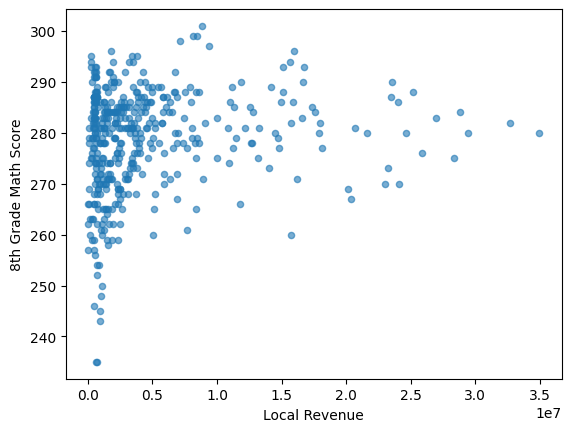

In [18]:
df.plot.scatter(x='local_rev', y='avg_math_grade_8', alpha = .6)
plt.xlabel('Local Revenue')
plt.ylabel('8th Grade Math Score')

**Scatterplot showcasing no relationship between local revenue and outcomes in 8th grade math scores**

**Visualization 2: Relative Local Revenue**

Text(0, 0.5, '8th Grade Math Score')

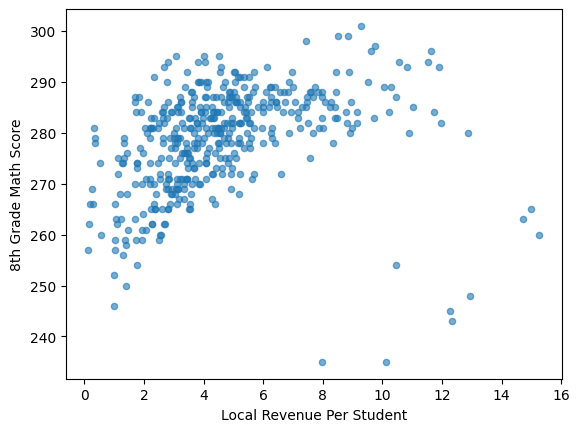

In [19]:
df.plot.scatter(x='local_rev_per_student', y='avg_math_grade_8', alpha = .6)
plt.xlabel('Local Revenue Per Student')
plt.ylabel('8th Grade Math Score')

**Scatterplot showcasing minimal relationship between the local revenue per student and the outcomes of 8th grade math scores**

#### Support Services
**Visualization 1: Raw Support Services Expenditure**

Text(0, 0.5, '8th Grade Math Score')

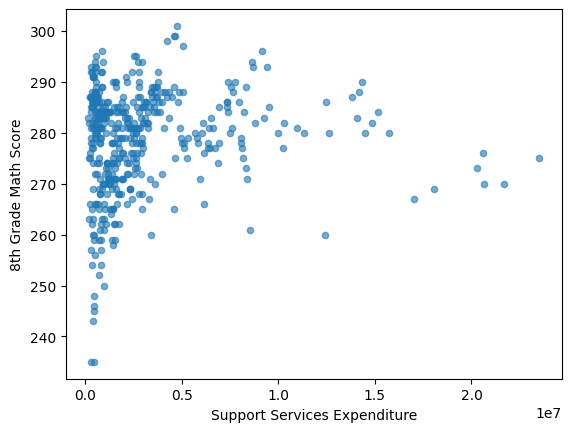

In [20]:
df.plot.scatter(x='support_services_exp', y='avg_math_grade_8', alpha = .6)
plt.xlabel('Support Services Expenditure')
plt.ylabel('8th Grade Math Score')

**Visualization 2: Relative Support Services Expenditure**

Text(0, 0.5, '8th Grade Math Score')

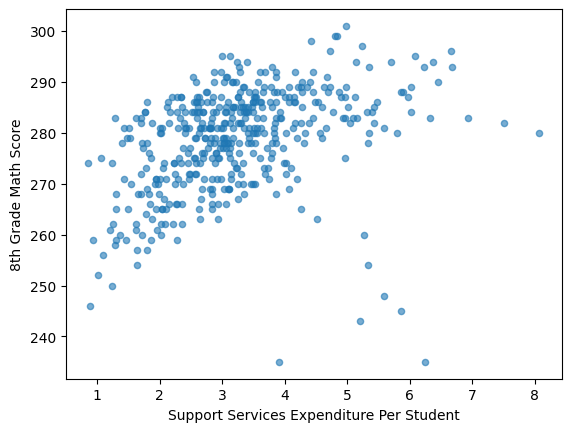

In [21]:
df.plot.scatter(x='support_services_per_student', y='avg_math_grade_8', alpha = .6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

**Scatterplot shows minimal relationship between support services expenditure per student and the outcome of 8th grade math scores**

#### Federal Funding
**Visualization 1: Raw Federal Funding**

Text(0, 0.5, '8th Grade Math Score')

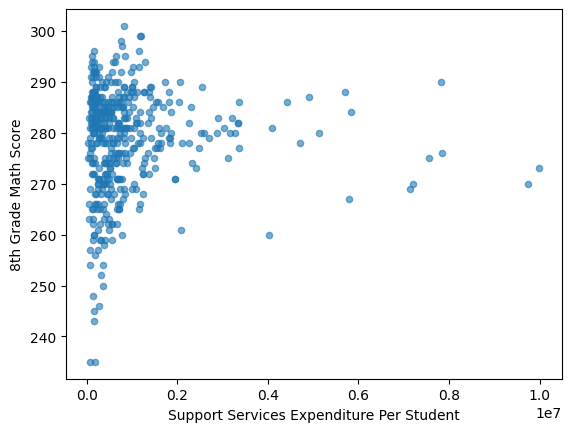

In [22]:
df.plot.scatter(x='fed_rev', y='avg_math_grade_8', alpha = .6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

**Scatterplot shows no relationship between federal funding and outcomes in 8th grade math scores**

Visualization 2: Relative Federal Funding

Text(0, 0.5, '8th Grade Math Score')

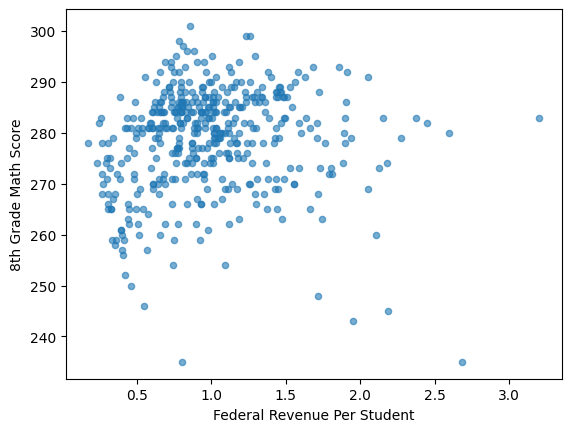

In [23]:
df.plot.scatter(x='fed_rev_per_student', y='avg_math_grade_8', alpha = .6)
plt.xlabel('Federal Revenue Per Student')
plt.ylabel('8th Grade Math Score')

**Scatterplot shows minimal relationship between federal revenue per student and the outcome of 8th grade math scores**

#### Grade Ratios
**Visualization 1: 8th Grade to 4th Grade**

Text(0, 0.5, '8th Grade Math Score')

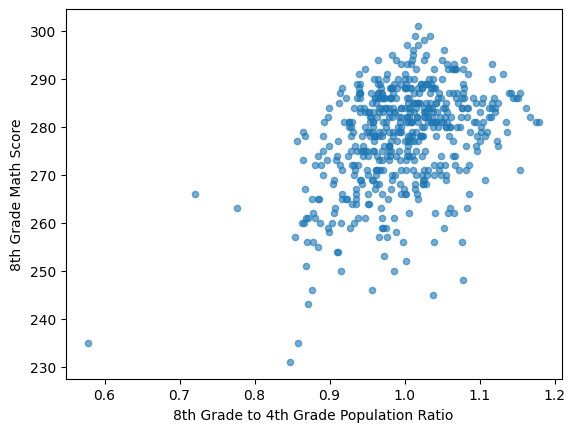

In [24]:
df.plot.scatter(x='grade_8_to_grade_4', y='avg_math_grade_8', alpha = .6)
plt.xlabel('8th Grade to 4th Grade Population Ratio')
plt.ylabel('8th Grade Math Score')

**This scatterplot shows a minimal to moderate correlation between the ratio of 8th grade students to 4th grade students and outcomes in 8th grade math scores**

**Visualization 2: 8th Grade to Kinder**

Text(0, 0.5, '8th Grade Math Score')

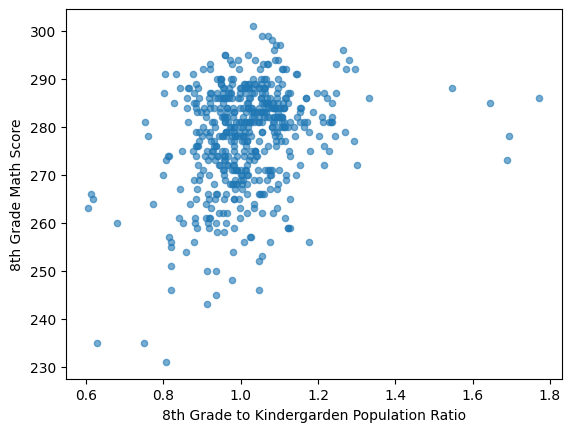

In [25]:
df.plot.scatter(x='grade_8_to_kinder', y='avg_math_grade_8', alpha = .6)
plt.xlabel('8th Grade to Kindergarden Population Ratio')
plt.ylabel('8th Grade Math Score')

**This scatterplot shows no relationship between the ratio of 8th grade students to kindergarden students and 8th grade math scores.**

**Visualization 3: 8th Grade to Pre-K**

Text(0, 0.5, '8th Grade Math Score')

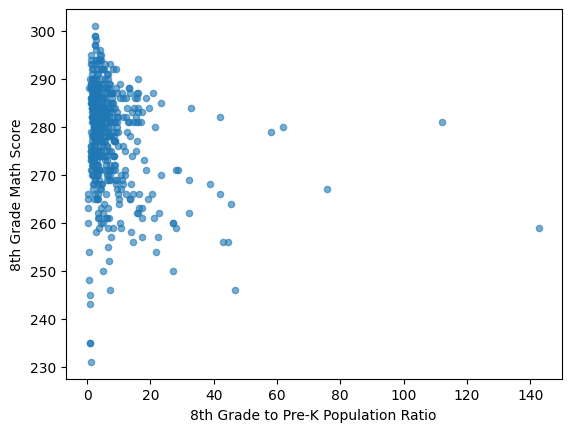

In [26]:
df.plot.scatter(x='grade_8_to_pre_k', y='avg_math_grade_8', alpha = .6)
plt.xlabel('8th Grade to Pre-K Population Ratio')
plt.ylabel('8th Grade Math Score')

**This scatterplot shows no relationship between the ratio of 8th grade students to pre-k students and 8th grade math scores.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df[['support_services_per_student','grade_8_to_grade_4']].dropna()
y = df.loc[X.index]['avg_math_grade_8']

In [42]:
df[['support_services_per_student','grade_8_to_grade_4','avg_math_grade_8']].dropna().count()

support_services_per_student    439
grade_8_to_grade_4              439
avg_math_grade_8                439
dtype: int64

In [60]:
# Replace NaN in y variable
y.describe()
# Going to use median as that's generally more reliable

count    439.000000
mean     278.676538
std       10.086166
min      235.000000
25%      273.000000
50%      281.000000
75%      286.000000
max      301.000000
Name: avg_math_grade_8, dtype: float64

In [61]:
y.fillna(y.median(), inplace=True)

In [62]:
# Choosing a test size of 30% so there's a sizeable testing group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [63]:
# I'm doing a simple linear regression
from sklearn.linear_model import LinearRegression

In [64]:
# create your model here
model = LinearRegression()

In [65]:
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Seeing what the intercepts are:
print(model.intercept_)
print(model.coef_)

256.11423365807383
[ 0.87334418 21.31694587]


In [88]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [90]:
# Wow
model.score(X_test, y_test)

0.04076626595085475

In [87]:
# Following suggestions in tutorial
error_mean = np.mean(model.predict(X_test)-y_test)
error_abs_mean = np.mean(np.abs(model.predict(X_test)-y_test))
root_mean_sqr = np.mean((model.predict(X_test)-y_test)**2)**.5
print('Mean Error: {0}\nMean Absolute Error: {1}\nRoot Mean Square Error: {2}'.format(error_mean, error_abs_mean, root_mean_sqr))

# I feel that the Root Mean Square Error is more effective as the spread in the data above would suggest the correlation had a high variance

Mean Error: -0.5810588292757694
Mean Absolute Error: 3.067476622038642
Root Mean Square Error: 4.729122505584434


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

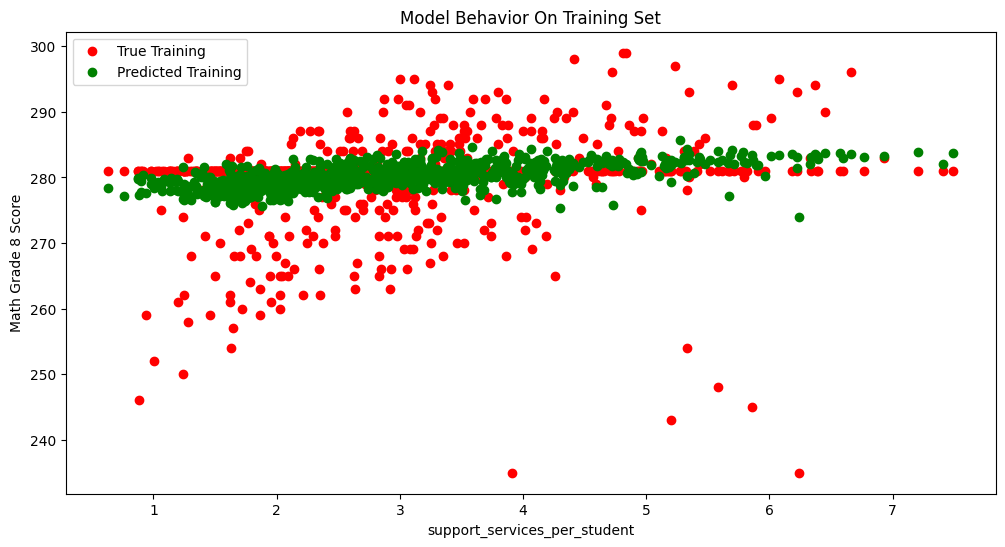

In [80]:
col_name = 'support_services_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math Grade 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

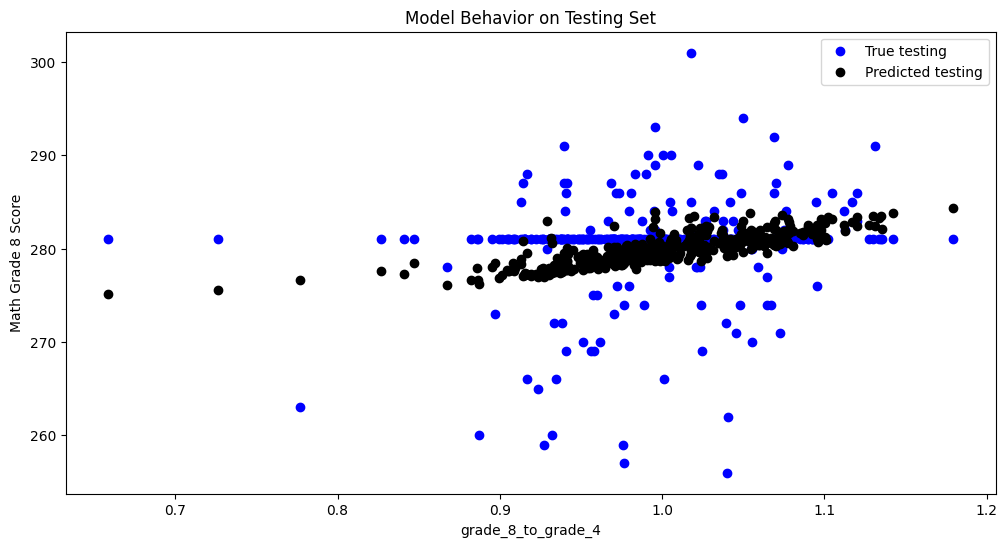

In [82]:
col_name = 'grade_8_to_grade_4'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math Grade 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

I explored the dataset and became interested in a possible connection between local revenue, federal revenue, and support services expenditure. I checked to see if NaN values could be replaced, but total revenue and expenditure were null where local revenue, federal revenue, and support services expenditure was null. 

I then conducted exploratory data analysis by looking at the relationship between my outcome variable and states. Next I completed some feature engineering on the dataframe, adding normalized metrics for the variables mentioned above, along with calculating ratio of student enrollment between 8th grade and the 3 individual grades below that to see if that could indicate dropout rates. 

Through the exploratory data analysis and visualization I found that all of my desired independent variables had little to no correlation with my dependent variable. However, I decided to try the two (`support_services_expenditure` and `grade_8_to_grade_4`) to see if a sufficiently accurate model was feasible given my data. I was wrong. My R^2 value was extremely low (R^2 = .04). 

 I wasn't too surprised given the results of my EDA, seeing how scattered the data  how weak each relationship was between each variable, but I wanted to try novel metrics and not follow along too closely to the tutorial. I imagine that my model could have failed due to picking the wrong type of model, poor data cleaning methods, and/or I required more granular data to adequately test what I thought each metric could represent about funding and expenditure within a state - __I look forward to hearing feedback on my work__.